# Week 10-9 다측면 감성 분석(RNN) Lab

1. smartthings_e_review_result.csv 파일을 열어서 review_df에 저장하시오.

In [1]:
# 데이터 읽기

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding

os.chdir(r'C:\Users\USER\kjw\LG전자_25\Week10')
review_df=pd.read_csv("smartthings_e_review_result.csv")

review_df

date  star  like  \
0      September 19, 2021     1  15.0   
1      September 17, 2021     1  12.0   
2      September 17, 2021     2  11.0   
3      September 15, 2021     2  15.0   
4      September 11, 2021     1   8.0   
...                   ...   ...   ...   
10955   November 16, 2019     1   NaN   
10956   December 12, 2020     3   NaN   
10957   December 14, 2019     1   NaN   
10958    January 17, 2019     1   NaN   
10959     January 8, 2020     4   NaN   

                                                 comment  \
0      Really unbelievable you can't even turn on a S...   
1      This app is so bad. It continually and randoml...   
2      I have this app on Android and iOS. It will no...   
3      Watch app does not sync current state status f...   
4      Unable to add my hue lights, every function co...   
...                                                  ...   
10955  Wont connect to my Samsung tv. Using samsung p...   
10956  This is good but have one issue with 4D-pad wh...   
10957  App crashes and stops. Removed, reinstall, try...   
10958  since this smart things came in they took the ...   
10959  It is good, you can do a lot, wish if they can...   

                                               comment_n  
0      ['really', 'unbelievable', 'even', 'turn', 'sa...  
1      ['app', 'bad', 'continually', 'randomly', 'tra...  
2      ['app', 'android', 'io', 'allow', 'add', 'phot...  
3      ['watch', 'app', 'sync', 'current', 'state', '...  
4      ['unable', 'add', 'hue', 'light', 'every', 'fu...  
...                                                  ...  
10955  ['wont', 'connect', 'samsung', 'tv', 'using', ...  
10956  ['good', 'one', 'issue', 'pad', 'app', 'go', '...  
10957  ['app', 'crash', 'stop', 'removed', 'reinstall...  
10958  ['since', 'smart', 'thing', 'came', 'took', 'q...  
10959  ['good', 'lot', 'wish', 'add', 'flexibility', ...  

[10960 rows x 5 columns]

2. 앞의 예제와 동일한 절차로 RNN 감성 분석 모델을 생성하시오.

In [2]:
# 목표 변수 만들기(이전 예제와 동일)
del_index=review_df[review_df['star']==3].index
review_df.drop(del_index,axis=0,inplace=True)
review_df.shape

(9948, 5)

In [3]:
review_df['sentiment']=review_df['star'].apply(lambda x: 1 if x>=4 else 0)
review_df

date  star  like  \
0      September 19, 2021     1  15.0   
1      September 17, 2021     1  12.0   
2      September 17, 2021     2  11.0   
3      September 15, 2021     2  15.0   
4      September 11, 2021     1   8.0   
...                   ...   ...   ...   
10954     August 24, 2019     4   NaN   
10955   November 16, 2019     1   NaN   
10957   December 14, 2019     1   NaN   
10958    January 17, 2019     1   NaN   
10959     January 8, 2020     4   NaN   

                                                 comment  \
0      Really unbelievable you can't even turn on a S...   
1      This app is so bad. It continually and randoml...   
2      I have this app on Android and iOS. It will no...   
3      Watch app does not sync current state status f...   
4      Unable to add my hue lights, every function co...   
...                                                  ...   
10954  Works pretty good, but there are times the rem...   
10955  Wont connect to my Samsung tv. Using samsung p...   
10957  App crashes and stops. Removed, reinstall, try...   
10958  since this smart things came in they took the ...   
10959  It is good, you can do a lot, wish if they can...   

                                               comment_n  sentiment  
0      ['really', 'unbelievable', 'even', 'turn', 'sa...          0  
1      ['app', 'bad', 'continually', 'randomly', 'tra...          0  
2      ['app', 'android', 'io', 'allow', 'add', 'phot...          0  
3      ['watch', 'app', 'sync', 'current', 'state', '...          0  
4      ['unable', 'add', 'hue', 'light', 'every', 'fu...          0  
...                                                  ...        ...  
10954  ['work', 'pretty', 'good', 'time', 'remote', '...          1  
10955  ['wont', 'connect', 'samsung', 'tv', 'using', ...          0  
10957  ['app', 'crash', 'stop', 'removed', 'reinstall...          0  
10958  ['since', 'smart', 'thing', 'came', 'took', 'q...          0  
10959  ['good', 'lot', 'wish', 'add', 'flexibility', ...          1  

[9948 rows x 6 columns]

<AxesSubplot:>

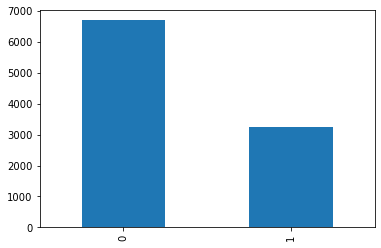

In [4]:
# 목표 변수 분포
review_df['sentiment'].value_counts().plot(kind='bar')

In [5]:
review_df['comment_n']=review_df['comment_n'].apply(lambda x: eval(x))

In [6]:
review_df['comment_n_str']=review_df['comment_n'].apply(lambda x: ' '.join(x))

In [7]:
# 입력 변수와 출력 변수 분리
X_data = review_df['comment_n_str']
y_data = review_df['sentiment']

In [8]:
# 토큰화
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_data)
sequences = tokenizer.texts_to_sequences(X_data)
print(sequences)

[[46, 1511, 16, 29, 3, 470, 3, 8, 242, 103, 381, 12, 1111, 1809, 356, 12, 946, 57, 1251, 97, 69, 7, 506, 252, 37, 16, 674, 6, 4], [1, 181, 1025, 657, 947, 89, 247, 44, 675, 382, 31, 1179, 1, 592, 131, 89, 247, 335, 93, 712, 281, 214, 8, 624, 1654, 44, 675, 6, 4], [1, 64, 1579, 154, 32, 263, 1434, 330, 2, 23, 5, 154, 144, 19, 149, 140, 65, 12, 1375, 455, 398, 1435, 78, 587, 1, 507, 135, 726, 6, 4], [150, 1, 554, 592, 647, 306, 633, 506, 93, 219, 399, 385, 476, 3, 102, 150, 625, 1, 93, 554, 647, 633, 5, 75, 92, 233, 194, 1339, 1, 508, 6, 4], [148, 32, 565, 92, 65, 135, 147, 713, 304, 1512, 126, 286, 1, 117, 962, 12, 267, 106, 72, 25, 2032, 131, 65, 12, 59, 32, 13, 1436, 1055, 457, 72, 16, 888, 327, 6, 4], [46, 9, 12, 9, 42, 44, 134, 249, 7, 54, 202, 1, 66, 601, 259, 423, 134, 8, 8, 804, 3086, 6, 4], [282, 284, 10, 273, 113, 500, 4761, 1, 979, 828, 47, 259, 980, 1002, 10, 323, 34, 1, 19, 2224, 458, 98, 190, 127, 423, 6, 4], [440, 3, 2, 38, 202, 1215, 188, 5, 1003, 308, 481, 151, 626, 981,

In [9]:
# 단어-to-인덱스 확인하기
word_to_index = tokenizer.word_index
print(word_to_index)

{'app': 1, 'tv': 2, 'samsung': 3, 'review': 4, 'device': 5, 'full': 6, 'work': 7, 'phone': 8, 'use': 9, 'update': 10, 'smart': 11, 'time': 12, 'new': 13, 'connect': 14, 'thing': 15, 'even': 16, 'smartthings': 17, 'control': 18, 'like': 19, 'get': 20, 'great': 21, 'remote': 22, 'one': 23, 'would': 24, 'home': 25, 'need': 26, 'hub': 27, 'working': 28, 'turn': 29, 'want': 30, 'keep': 31, 'add': 32, 'still': 33, 'using': 34, 'screen': 35, 'back': 36, 'say': 37, 'make': 38, 'issue': 39, 'good': 40, 'used': 41, 'connected': 42, 'able': 43, 'bluetooth': 44, 'feature': 45, 'really': 46, 'everything': 47, 'option': 48, 'support': 49, 'easy': 50, 'find': 51, 'love': 52, 'tried': 53, 'well': 54, 'since': 55, 'also': 56, 'never': 57, 'way': 58, 'go': 59, 'could': 60, 'try': 61, 'apps': 62, 'old': 63, 'android': 64, 'every': 65, 'problem': 66, 'classic': 67, 'version': 68, 'automation': 69, 'switch': 70, 'useless': 71, 'set': 72, 'worked': 73, 'much': 74, 'show': 75, 'please': 76, 'better': 77, 'go

In [10]:
# 단어 빈도수 확인
tokenizer.word_counts.items()

odict_items([('really', 596), ('unbelievable', 13), ('even', 1270), ('turn', 750), ('samsung', 3938), ('television', 76), ('phone', 2822), ('absolutely', 149), ('user', 334), ('friendly', 93), ('time', 1517), ('figured', 22), ('forgot', 9), ('next', 101), ('glitchy', 29), ('never', 522), ('hold', 18), ('setting', 356), ('automation', 477), ('work', 2921), ('correctly', 70), ('interface', 143), ('say', 675), ('bixby', 47), ('full', 2939), ('review', 3040), ('app', 8154), ('bad', 192), ('continually', 25), ('randomly', 49), ('transfer', 29), ('audio', 383), ('output', 147), ('bluetooth', 620), ('headset', 47), ('unless', 93), ('keep', 718), ('checking', 20), ('current', 57), ('location', 261), ('almost', 107), ('always', 371), ('miss', 44), ('call', 129), ('message', 167), ('ring', 53), ('beep', 11), ('android', 504), ('io', 12), ('allow', 226), ('add', 713), ('photo', 137), ('gallery', 14), ('frame', 110), ('tv', 4309), ('one', 931), ('device', 2985), ('seems', 243), ('like', 1127), ('g

In [11]:
# 한 번 출현한 단어 비율 확인하기
threshold = 2
total_cnt = len(word_to_index) # 단어의 수
rare_cnt = 0
total_freq = 0
rare_freq = 0

for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합(vocabulary)에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)


등장 빈도가 1번 이하인 희귀 단어의 수: 4172
단어 집합(vocabulary)에서 희귀 단어의 비율: 46.70846394984326
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 2.091668421422054


In [12]:
# 단어 사이즈 확인
vocab_size = len(word_to_index) + 1  # 패딩을 위한 토큰인 0번 고려
print('단어 집합의 크기: {}'.format((vocab_size)))

단어 집합의 크기: 8933


텍스트의 최대 길이 : 42
텍스트의 최소 길이 : 1
텍스트의 평균 길이 : 20.050060


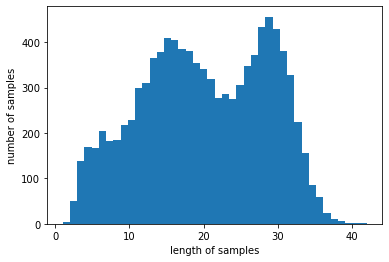

In [14]:
# 텍스트 길이 분포 보기
X_data = sequences
print('텍스트의 최대 길이 : %d' % max(len(l) for l in X_data))
print('텍스트의 최소 길이 : %d' % min(len(l) for l in X_data))
print('텍스트의 평균 길이 : %f' % (sum(map(len, X_data))/len(X_data)))
plt.hist([len(s) for s in X_data], bins=42)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [15]:
# 패딩과 훈련 데이터, 테스트 데이터 나누기
max_len = 42
data = pad_sequences(X_data, maxlen = max_len)
print("훈련 데이터의 크기(shape): ", data.shape)

# 훈련 데이터와 테스트 데이터 분리

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, y_data, test_size=0.3, random_state=156)
print('train data set size = {0},  test data set size = {1}'.format(x_train.shape[0],x_test.shape[0]))
x_train[0]

훈련 데이터의 크기(shape):  (9948, 42)
train data set size = 6963,  test data set size = 2985


array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0, 1276,   69,  907,  857,   51,
       1549,   72, 1869,  438,  339, 3155, 1653,   69, 1384])

In [16]:
# LSTM 모델 만들기
from tensorflow.keras.layers import LSTM, Embedding, Dense
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Embedding(vocab_size, 32)) 
model.add(LSTM(32)) 
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=8, batch_size=64, validation_split=0.2)

Epoch 1/8
88/88 [==============================] - 3s 15ms/step - loss: 0.5036 - acc: 0.7711 - val_loss: 0.4024 - val_acc: 0.8119
Epoch 2/8
88/88 [==============================] - 1s 10ms/step - loss: 0.3192 - acc: 0.8813 - val_loss: 0.3179 - val_acc: 0.8729
Epoch 3/8
88/88 [==============================] - 1s 11ms/step - loss: 0.2463 - acc: 0.9113 - val_loss: 0.3255 - val_acc: 0.8729
Epoch 4/8
88/88 [==============================] - 1s 11ms/step - loss: 0.2092 - acc: 0.9268 - val_loss: 0.2835 - val_acc: 0.8959
Epoch 5/8
88/88 [==============================] - 1s 11ms/step - loss: 0.1823 - acc: 0.9366 - val_loss: 0.3029 - val_acc: 0.8859
Epoch 6/8
88/88 [==============================] - 1s 10ms/step - loss: 0.1635 - acc: 0.9458 - val_loss: 0.3271 - val_acc: 0.8737
Epoch 7/8
88/88 [==============================] - 1s 11ms/step - loss: 0.1474 - acc: 0.9524 - val_loss: 0.3127 - val_acc: 0.8916
Epoch 8/8
88/88 [==============================] - 1s 11ms/step - loss: 0.1317 - acc: 0.95

94/94 [==============================] - 0s 3ms/step - loss: 0.3669 - acc: 0.8720

 테스트 정확도: 0.8720


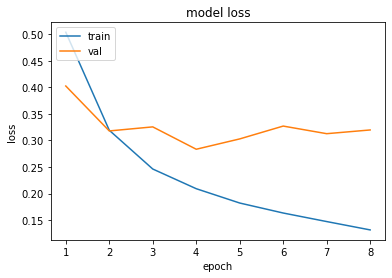

In [17]:
# 성능 평가
# 정확도 확인
print("\n 테스트 정확도: %.4f" % (model.evaluate(x_test, y_test)[1]))

# Loss 시각화
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

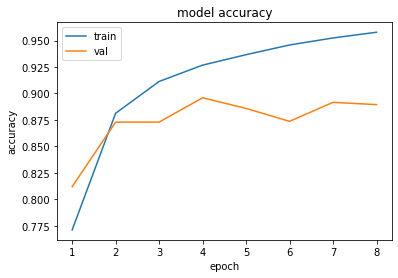

In [18]:
# 정확도 시각화 
plt.plot(epochs, history.history['acc'])
plt.plot(epochs, history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

3. 생성한 RNN 모델을 이용해서 전체 데이터 집합에 대한 감성 점수(1 또는 0)을 생성하시오.

4. 앞의 예제와 동일한 aspect를 사용하여 문장들을 aspect 할당하고, 이 정보를 포함하는 데이터프레임(review_df_final)을 생성하시오.

5. aspect 별 감성 점수를 생성하고 레이더 차트로 그리시오.

6. LG와 삼성을 비교할 수 있도록 두 데이터를 함께 레이터 차트에 표현하시오.

In [2]:
lg_aspect_score= {'connect': 0.17545982575024202,
 'update': 0.22338709677419355,
 'tv': 0.14175399889685603,
 'ac': 0.35907859078590787,
 'washer': 0.4559496567505721,
 'refrigerator': 0.4397905759162304}

In [3]:
ss_aspect_score={'connect': 0.2502116850127011,
 'update': 0.12994836488812392,
 'tv': 0.2243521476748314,
 'ac': 0.15483870967741936,
 'washer': 0.25257731958762886,
 'refrigerator': 0.1557377049180328}

In [4]:
lg_df=pd.DataFrame.from_dict(lg_aspect_score,orient='index')

In [5]:
lg_df

0
connect       0.175460
update        0.223387
tv            0.141754
ac            0.359079
washer        0.455950
refrigerator  0.439791

In [6]:
lg_df=lg_df.reset_index()

In [7]:
lg_df.columns=['aspect','score']

In [8]:
lg_df

aspect     score
0       connect  0.175460
1        update  0.223387
2            tv  0.141754
3            ac  0.359079
4        washer  0.455950
5  refrigerator  0.439791

In [9]:
lg_df['company']='lg'

In [10]:
lg_df

aspect     score company
0       connect  0.175460      lg
1        update  0.223387      lg
2            tv  0.141754      lg
3            ac  0.359079      lg
4        washer  0.455950      lg
5  refrigerator  0.439791      lg

In [11]:
ss_df=pd.DataFrame.from_dict(ss_aspect_score,orient='index')

In [12]:
ss_df

0
connect       0.250212
update        0.129948
tv            0.224352
ac            0.154839
washer        0.252577
refrigerator  0.155738

In [13]:
ss_df=ss_df.reset_index()

In [14]:
ss_df

index         0
0       connect  0.250212
1        update  0.129948
2            tv  0.224352
3            ac  0.154839
4        washer  0.252577
5  refrigerator  0.155738

In [15]:
ss_df.columns=['aspect','score']

In [16]:
ss_df['company']='samsung'

In [17]:
ss_df

aspect     score  company
0       connect  0.250212  samsung
1        update  0.129948  samsung
2            tv  0.224352  samsung
3            ac  0.154839  samsung
4        washer  0.252577  samsung
5  refrigerator  0.155738  samsung

In [18]:
df=pd.concat([lg_df,ss_df],axis=0)

In [19]:
df

aspect     score  company
0       connect  0.175460       lg
1        update  0.223387       lg
2            tv  0.141754       lg
3            ac  0.359079       lg
4        washer  0.455950       lg
5  refrigerator  0.439791       lg
0       connect  0.250212  samsung
1        update  0.129948  samsung
2            tv  0.224352  samsung
3            ac  0.154839  samsung
4        washer  0.252577  samsung
5  refrigerator  0.155738  samsung

In [21]:
import plotly.express as px

In [22]:
fig = px.line_polar(df, r="score", theta="aspect", color="company", line_close=True,range_r=[0,0.5])

# 내부 색칠하기
fig.update_traces(fill='toself')

fig.show()